# **NEURAL NETWORK FROM (SCRATCH)**🕸️


## *BUILDING ARTIFICIAL NEURAL NETWORK FROM SCRATCH*
### *Artificial Neural Networks (ANNs)* : are a collection of interconnected layers of neurons. It includes:

#### *Input Layer:* Receives input features.
#### *Hidden Layers:* Process information through weighted connections and activation functions.
#### *Output Layer:* Produces the final prediction.
#### *Weights and Biases:* Trainable parameters that adjust during learning.
#### *Activation Functions:* Introduces non-linearity which allows the network to learn complex patterns. 

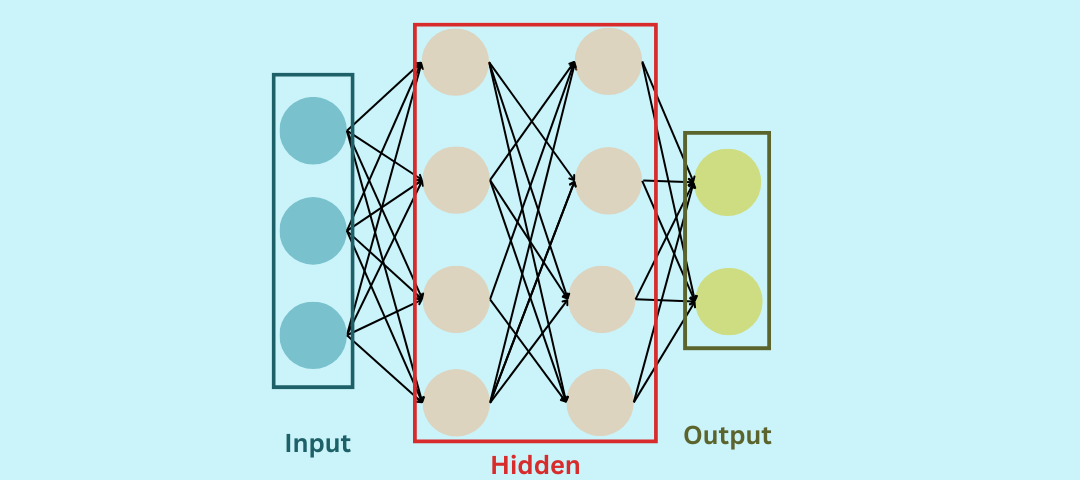

In [610]:
from IPython.display import Image
Image(filename='Assets/nn.png')

# 1 - IMPORT NECESSARY USED LIBRARIES

#### Pandas     ->  For handling datasets in DataFrame format         
#### numpy      ->  For numerical computations and array operations
#### sklearn    ->  For make building , training & evaluating machine learning models
#### matplotlib ->  For visualisattion
#### seaborn    ->  For visualisation

''' 
    DATA HANDLING : PANDAS + NUMPY
    PROCESSING & DATA SPLITTING + EVALUATION : SCI-KIT LEARN 
    VISUALISATION : MATPLOTLIB + SEABORN 
'''

###### from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder  : 
                    # StandardScaler: Scales features to have mean=0 and std=1
                    # LabelEncoder: Converts categorical labels to numeric labels
                    # OneHotEncoder: Converts categorical features into one-hot numeric arrays

###### from sklearn.compose import ColumnTransformer  :
                    # Allows you to apply different transformations to different columns

###### from sklearn.pipeline import Pipeline  :
                    # Allows you to chain preprocessing and modeling steps together

###### from sklearn.model_selection import train_test_split :
                    # Splits data into training, validation, and test sets

######  from sklearn.metrics import confusion_matrix : 
                    # Computes confusion matrix to evaluate classification models

In [ ]:
import pandas as pd   
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# 2- LOAD DATA SET 

In [ ]:
   #LOADING FOR DATA
data=pd.read_csv('Assets/Churn_Modelling.csv')

    #SELECTING FEATURES AND TARGET
X = data[['CreditScore','Geography','Gender','Age','Tenure','Balance',
          'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=data['Exited']

 #SHOW FIRST ROWS 
print(X.head())

print(X.columns.tolist())

    #GET INFOS 
data.info()

    #GET STATISTICS
print("\nSummary statistics:")
print(data.describe())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column        

# 3 - VISUALISATION & (EDA)

Shape of dataset: (10000, 14)

Data types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


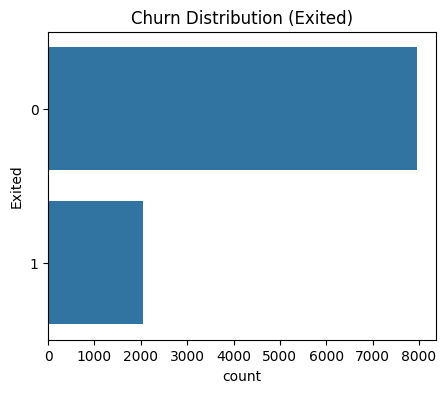

In [ ]:
    #SHOW DATASET SHAPE 
print("Shape of dataset:", data.shape)

    #SHOW TYPES OF COLUMNS
print("\nData types:" , data.dtypes)

    #VIEW SUM OF NULL VALUES 
print("\nMissing values per column:" , data.isnull().sum())

    
    #Visualize Target Variable Distribution
plt.figure(figsize=(5,4))
sns.countplot(y=data["Exited"])
plt.title("Churn Distribution (Exited)")
plt.show()

In [ ]:
    #IDENTIFYING FEATURE TYPES 
categorical_features = ['Geography', 'Gender']
numerical_features = [col for col in X.columns if col not in categorical_features]


    #CREATE A PREPROCESSING PIPELINE
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
        ("num", StandardScaler(), numerical_features)    ] )


    #APPLY PREPROCESSING
X_numeric = preprocessor.fit_transform(X)


    #CONVERTING TARGET TO NUMERIC ARRAY
y_numeric = np.array(y, dtype=float)



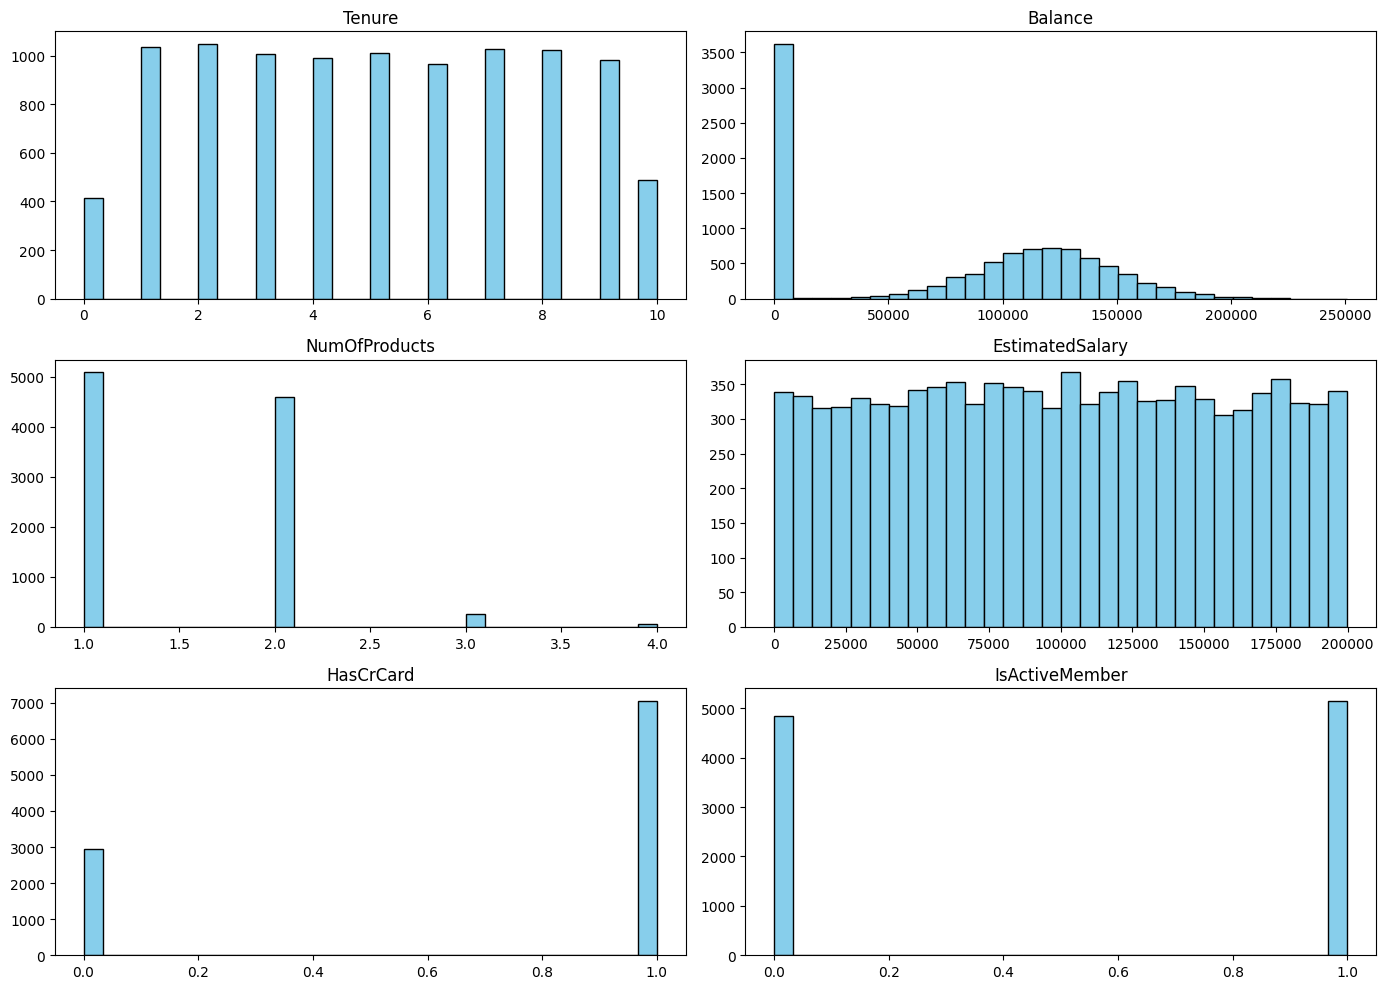

In [ ]:
    #VISUALISE NUMERICAL FEATURE DISTRIBUTIONS
numerical_features = ['Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    plt.hist(X[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(feature)
plt.tight_layout()
plt.show()


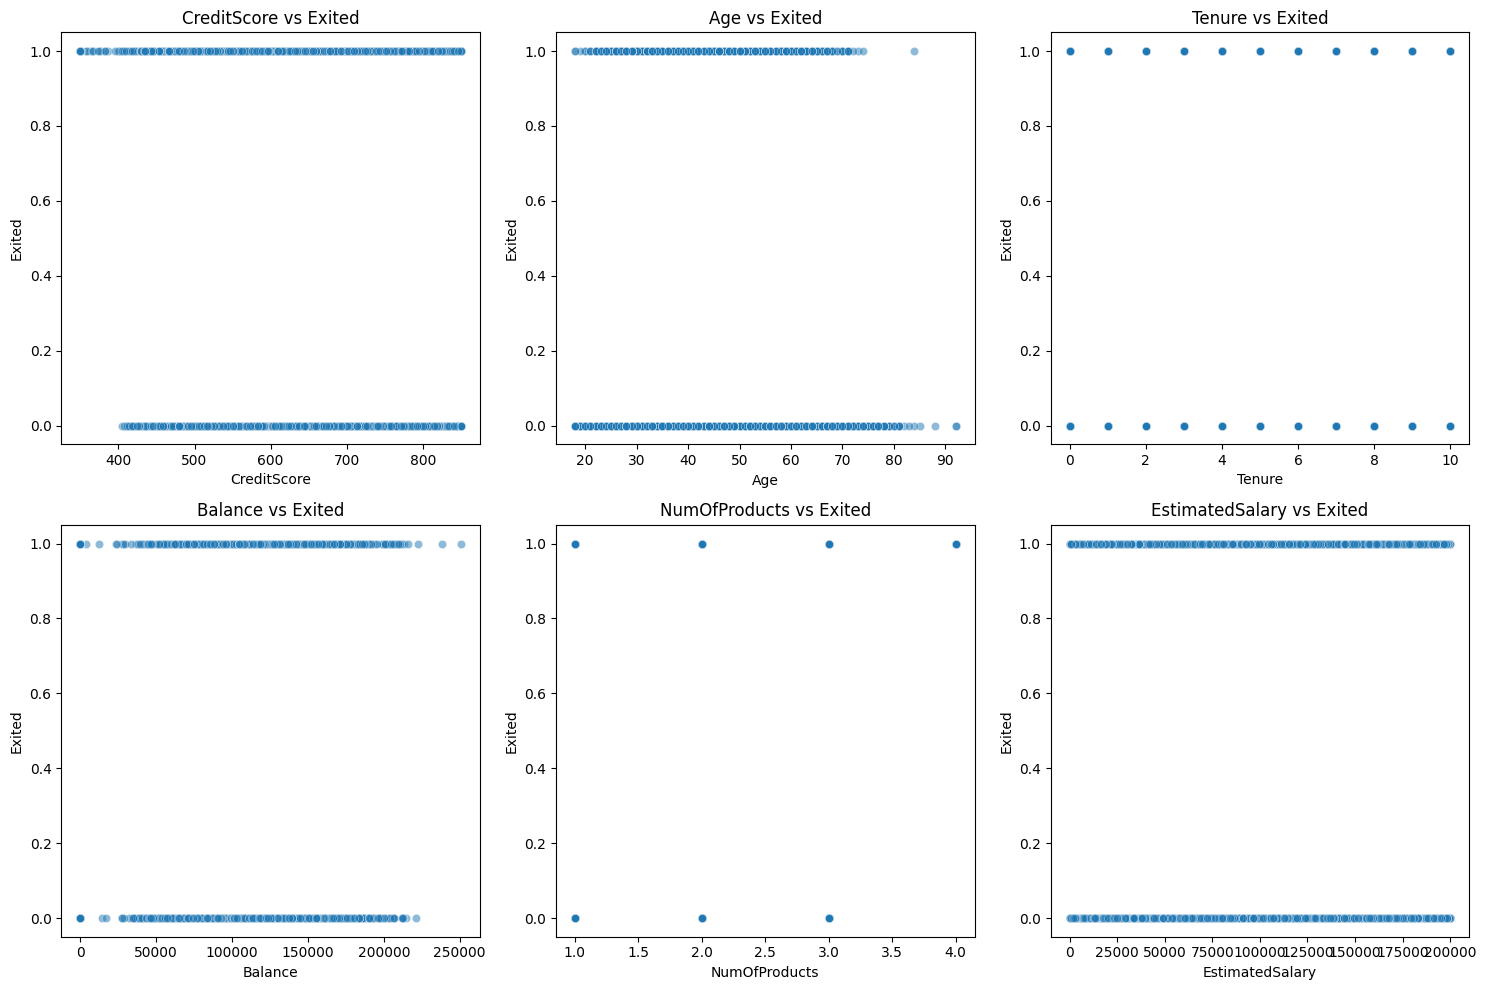

In [ ]:
    #VISUALISE NUMERICAL FEATURES VS TARGET
numerical_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
target = 'Exited'

plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y=target, data=data, alpha=0.5)
    plt.title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()


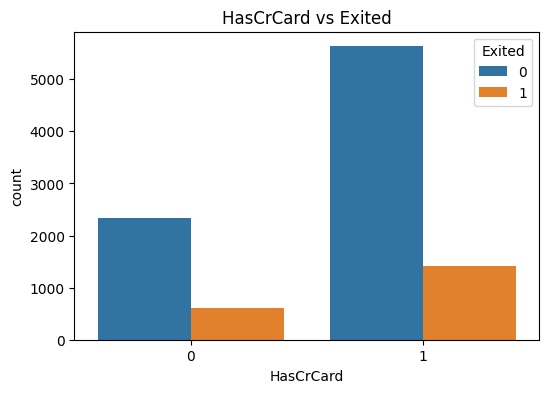

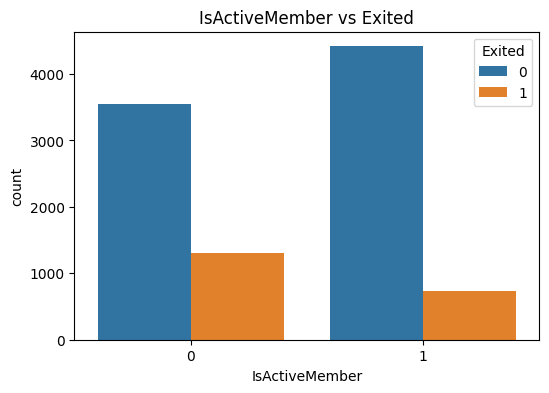

In [ ]:
    #VISUALISE HasCard & IsActiveMember FEATURES VS TARGET
categorical_features = ['HasCrCard','IsActiveMember']

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature,hue=target,data=data)
    plt.title(f'{feature} vs {target}')
    plt.show()

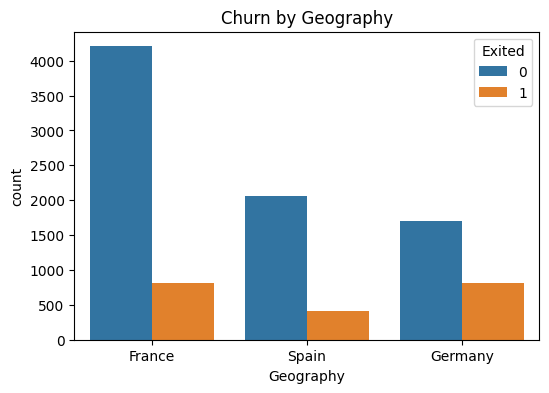

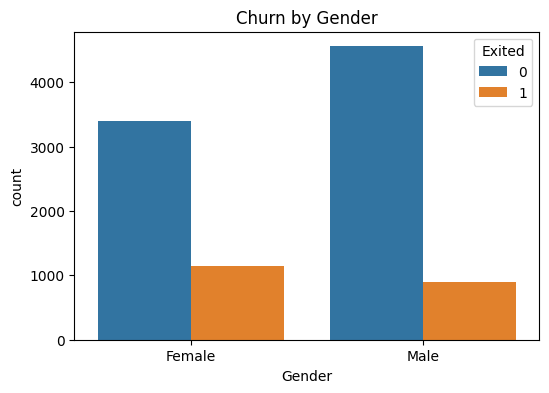

In [ ]:
    #VISUALISE CATEGORICAL FEATURES VS TARGET 
plt.figure(figsize=(6,4))
sns.countplot(x="Geography", hue=y, data=data)
plt.title("Churn by Geography")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue=y, data=data)
plt.title("Churn by Gender")
plt.show()

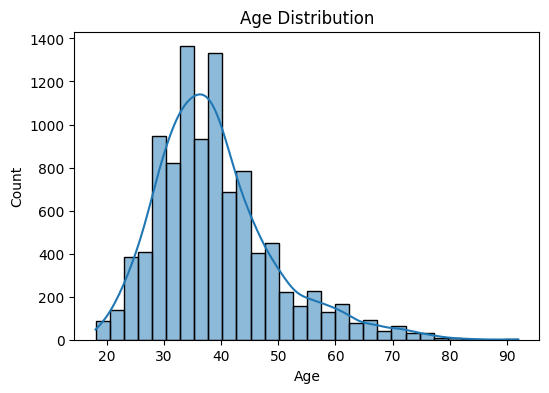

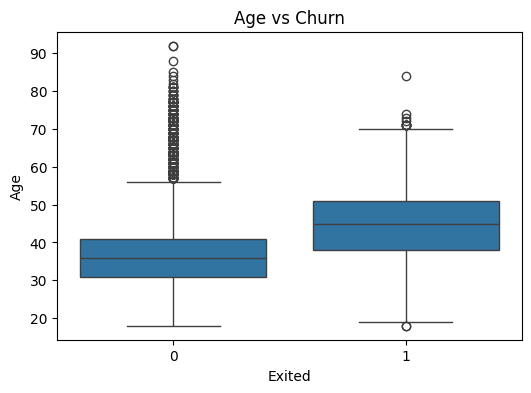

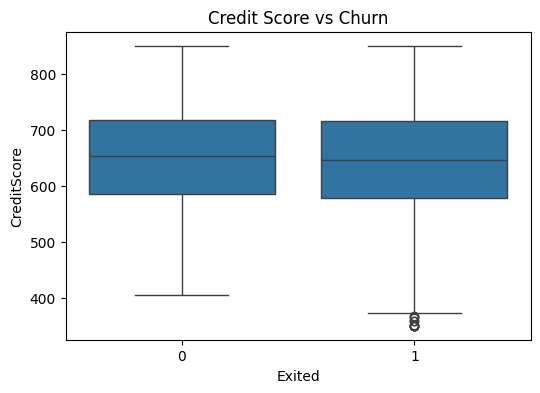

In [ ]:
    #VISUALISE AGE DISTRIBUTION
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

    #VISUALISE AGE VS CHURN 
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y="Age", data=data)
plt.title("Age vs Churn")
plt.show()

    #VISUALISE SCORE VS CHURN 
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y="CreditScore", data=data)
plt.title("Credit Score vs Churn")
plt.show()

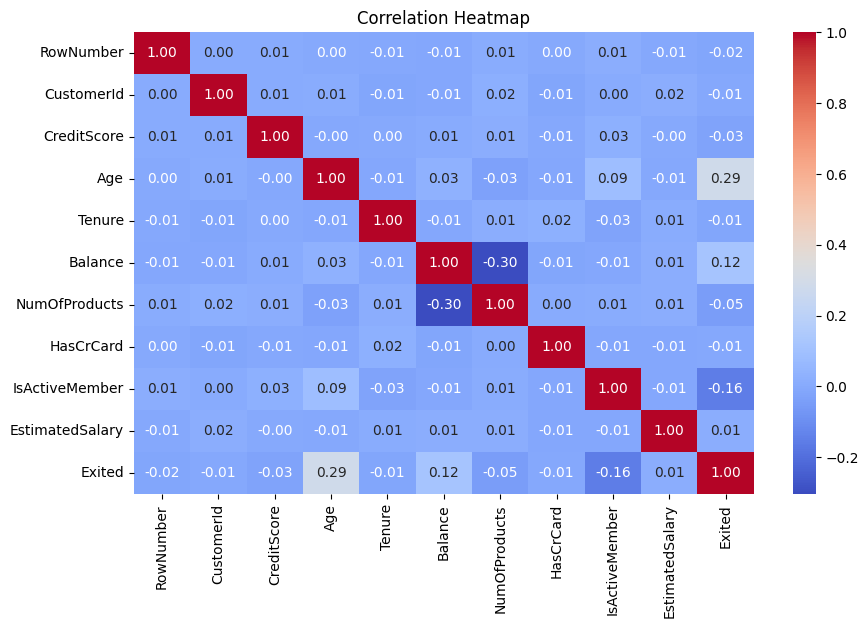

In [ ]:
    #VISUAISE CORRELATION
plt.figure(figsize=(10,6))
numeric_data = data.select_dtypes(include=[float, int])  # select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4 - DATA SPLITTING 

In [ ]:
    #SPLIT (X,Y) INTO TRAIN , TEST & VALIDATION SETS
X_train_val, X_test, y_train_val, y_test = train_test_split(X_numeric, y_numeric, test_size=0.15, random_state=42)

    #SPLIT TRAIN SET INTO TRAIN & VALIDATION SETS
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

    #TRANSPOSE SHAPES AND RESHAPE TARGET (IMPORTANT WHILE IMPLEMENTING NEURAL NETWORK FROM SCRATCH)
X_train, X_val, X_test = X_train.T, X_val.T, X_test.T
y_train, y_val, y_test = y_train.reshape(1,-1), y_val.reshape(1,-1), y_test.reshape(1,-1)

# 5 - INITIALIZE NEURAL NETWORK PARAMETERS  

In [637]:
    # DEFINE NB OF INPUT , NB OF HIDDEN LAYERS & NB OF OUTPUT LAYERS
    # SPECIFY NB OF NEURONS IN EACH LAYER
input_size = X_numeric.shape[1]
hidden1_size =8                      #NB OF NEURONS IN 1ST HIDDEN LAYER
hidden2_size =4                      #NB OF NEURONS IN 2ND HIDDEN LAYER
output_size= 1                       # 1 OUTPUT WHICH MEANS THE TARGET IS CLASSIFIED IN A SINGLE CLASS (BINARY)


def initialize_parameters(input_size, hidden1_size, hidden2_size, output_size): 
    np.random.seed(42) 
    parameters = { "W1": np.random.randn(hidden1_size, input_size) * 0.1,
                  "b1": np.zeros((hidden1_size, 1)), 
                  "W2": np.random.randn(hidden2_size, hidden1_size) * 0.1, 
                  "b2": np.zeros((hidden2_size, 1)), 
                  "W3": np.random.randn(output_size, hidden2_size) * 0.1, 
                  "b3": np.zeros((output_size, 1)) } 
    return parameters

'''
 - SET INITIAL WEIGHTS & BIASES FOR LAYERS OF THE NETWORK
 - WEIGHTS(W1,W2,W3) ARE INITIALISED WITH RANDOM VALUES OF (0.1)
 - BIASES (B1,B2,B3) ARE INITIALISED AS ZERO VECTORS 

 W1 → WEIGHTS FROM INPUT LAYER TO THE 1ST HIDDEN LAYER
 b1 → BIAS FOR THE 1ST HIDDEN LAYER 
 W2 → WEIGHT FROM 1ST TO 2ND HIDDEN LAYER
 b2 → BIAS FOR 2ND HIDDEN LAYER
 W3 → WEIGHT FROM 2ND LAYER TO THE OUTPUT LAYER
 b3 → BIAS FOR OUTPUT LAYER
'''


'\n - SET INITIAL WEIGHTS & BIASES FOR LAYERS OF THE NETWORK\n - WEIGHTS(W1,W2,W3) ARE INITIALISED WITH RANDOM VALUES OF (0.1)\n - BIASES (B1,B2,B3) ARE INITIALISED AS ZERO VECTORS \n\n W1 → WEIGHTS FROM INPUT LAYER TO THE 1ST HIDDEN LAYER\n b1 → BIAS FOR THE 1ST HIDDEN LAYER \n W2 → WEIGHT FROM 1ST TO 2ND HIDDEN LAYER\n b2 → BIAS FOR 2ND HIDDEN LAYER\n W3 → WEIGHT FROM 2ND LAYER TO THE OUTPUT LAYER\n b3 → BIAS FOR OUTPUT LAYER\n'

# 6 - DEFINE ACTIVATION FUNCTIONS 

In [ ]:
def sigmoid(Z): 
    return 1 / (1 + np.exp(-Z))

def relu(Z):    
    return np.maximum(0, Z)

def relu_derivative(Z):  
    return (Z > 0).astype(int)

''' 
- SIGMOID FUNCTION : NEEDED FORM BINARY CLASSIFICATION (OUTPUT)
- RELU FUNCTION : NEEDED AS ACTIVATION FUNCT FOR HIDDEN LAYERS 
- RELU DERIVATIVE : NEEDED FOR 'BACK-PROPAGATION' FOR COMPUTING GRADIENTS
'''

In [ ]:
        ### FORWARD PROPAGATION FUNCTION
def forward_propagation(X, parameters, keep_prob=1.0):
    
        #RECALL THE PARAMETERS OF THE NETWORK
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    W3, b3 = parameters["W3"], parameters["b3"]


        #ACTIVATION 1ST LAYER 
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
        #DROPOUT TO PREVENT OVERFITTING
    D1 = (np.random.rand(*A1.shape) < keep_prob) / keep_prob        
    A1 *= D1


        #ACTIVATION FOR 2ND LAYER
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
        #DROPOUT TO PREVENT OVERFITTING
    D2 = (np.random.rand(*A2.shape) < keep_prob) / keep_prob
    A2 *= D2


    # Output layer
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)


    cache = {"Z1": Z1, "A1": A1, "D1": D1,
             "Z2": Z2, "A2": A2, "D2": D2,
             "Z3": Z3, "A3": A3}
    return A3, cache

''' 
- FROWARD PROPAGATION : COMPUTES THE OUTPUT OF THE NURAL NETWORK FOR A GIVEN INPUT X AND PARAMETERS
- CALCULATE Z1 FOR THE 1ST HIDDEN LAYER = (W1.X + b1)
- APPLY RELU ACTIVATION FUNCTION TO Z1 = A1
- CALCULATE Z2 FOR THE 2ND HIDDEN LAYER = (W2.X + b2)
- APPLY RELU ACTIVATION FUNCTION TO Z2 = A2
- CALCULATE Z3 FOR THE OUTPUT LAYER = (W3.X + b3)
- APPLY SIGMOID FUNCTION TO Z3 = A3

THE FUNCTION RETURNS A3 AND CACH , CACHE CONTAINS INTERMEDIATE VALUES FOR BACK-PROP  


# Z1 = LINEAR COMBINATTION FOR 1ST HIDDEN LAYER
# A1 = 1ST ReLU ACTIVATION
# Z2 = LINEAR COMBINATION FOR 2ND LAYER 
# A2 = 2ND ReLU ACTIVATION 
# Z3 = LINEAR COMBINATION FOR OUTPUT LAYER 
# A3 = SIGMOID OUTOUT → PREDICTED PROBABILITY
# CACHE → STORES INTERMEDIATE VALUES FOR BACK-PROP
'''

In [ ]:
    # LOSS FUNCTION COMPUTATION 
def loss(y, A3, parameters, lambd=0.01):
            
    #CROSS-ENTOPY LOSS
    m = y.shape[1]
    A3 = np.clip(A3, 1e-10, 1-1e-10)                #CLIP IS TO AVOID LOG(0)
    cross_entropy = -np.sum(y*np.log(A3) + (1-y)*np.log(1-A3)) / m
    
    
    #REGULARISATION TERM TO PREVENT OVERFITTING 
    L2 = (lambd/(2*m)) * (np.sum(parameters["W1"]**2) +
                          np.sum(parameters["W2"]**2) +
                          np.sum(parameters["W3"]**2))
    return cross_entropy + L2         # -> MEASURES HOW WELL NEURAL NETWORK'S PREDICTION MATCH 'Y'

In [ ]:
def back_propagation(X, y, parameters, cache, lambd=0.01):
        #RETIEVING VALUES TO USE THEM 
    m = X.shape[1]
    W1, W2, W3 = parameters["W1"], parameters["W2"], parameters["W3"]
    A1, A2, A3 = cache["A1"], cache["A2"], cache["A3"]
    D1, D2 = cache["D1"], cache["D2"]


        #OUTPUT LAYER GRDIENTS 
    dZ3 = A3 - y
    dW3 = (1/m) * np.dot(dZ3, A2.T) + (lambd/m)*W3          #GRADIENT WEIGHT + REGULARISATION TERM
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)        


        #2ND LAYER GRADIENTS 
    dA2 = np.dot(W3.T, dZ3)
    dA2 *= D2
    dZ2 = dA2 * relu_derivative(cache["Z2"])
    dW2 = (1/m) * np.dot(dZ2, A1.T) + (lambd/m)*W2
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        #1ST LAYER GRADIENTS
    dA1 = np.dot(W2.T, dZ2)
    dA1 *= D1
    dZ1 = dA1 * relu_derivative(cache["Z1"])
    dW1 = (1/m) * np.dot(dZ1, X.T) + (lambd/m)*W1
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1,
             "dW2": dW2, "db2": db2,
             "dW3": dW3, "db3": db3}
    return grads                            # COMPUTE LOSS FOR GRADIENT DESCENT PARAMS

'''  
- BACKPROPAGATION CALCULATE GRADIENTS TO UPDATE THE NETWORK PARAMETERS DURING TRAINING
- CALCULATES THE ERROR AT dZ3 =A3 - Y
- USING THE ERROR, BACK-PROPAGATION CALCULATES GRADIENTS OF (dW3,db3) FOR THE OUTPUT LAYER 
- IT PROPAGATES THE ERROR TOTHE HIDDEN LAYER BY MULTIPLYING WITH THE TRANSPOSE OF W3 & ELEMENT WISE WITH THE DERIVATIVE OF THE ReLU ACTIVATION (ReLU_DERIVATIVE)
- IT CALCULATES GRADIENTS FOR 1ST AND 2ND HIDDEN LAYER (dW1 , db1, dW2, db2)
 
 ALL GRADIENTS ARE AVEREGED OVER THE NB OF EXAMPLES 'm' TO ENSURE STABLE UPDATES 
 '''

# 7 - UPDATING PARAMETERS

In [ ]:
        #THIS STEP IS TO STORE THE MODEL PARAMETERS WHICH ARE READY TO PASS THEM THREW TRAINING STEP
def update_parameters(parameters, grads, lr):
    
        #UPDATE PARAMETERS FOR 1ST LAYER 
    parameters["W1"] -= lr * grads["dW1"]
    parameters["b1"] -= lr * grads["db1"]
    
        #UPDATE PARAMETERS FOR 2ND LAYER 
    parameters["W2"] -= lr * grads["dW2"]
    parameters["b2"] -= lr * grads["db2"]
    
        #UPDATE PARAMETERS FOR OUTPUT LAYER
    parameters["W3"] -= lr * grads["dW3"]
    parameters["b3"] -= lr * grads["db3"]
    
    return parameters

# 8 - CREATE MINI-BATCH GRADIENT DESCENT 

In [ ]:
    #APPLYING MINI-BATCH GRADIENT DESCENT TO PREVENT OVERFITTING COMPARED TO FULL-BATCH GRADIENT DESCENT
def create_mini_batches(X, y, batch_size):
    
    #SHUFFLE DATA SET TO ENSURE CONVERGENCE & REDUCE BIAS
    m = X.shape[1]
    permutation = np.random.permutation(m)
    X_shuffled = X[:, permutation]
    y_shuffled = y[:, permutation]
    
    #SPLIT INTO MINI-BATCHES
    mini_batches = []
    for i in range(0, m, batch_size):
        X_batch = X_shuffled[:, i:i+batch_size]
        y_batch = y_shuffled[:, i:i+batch_size]
        mini_batches.append((X_batch, y_batch))
    
    return mini_batches         # -> RETURNS LIST OF MINI-BATCHES READY TO TRAIN

# 9 - TRAINING LOOP 

In [ ]:
        #COMBINE ALL OF : MINI-BATCHES,ReLU,SIGMOID,DROPOUT & L2 REGULARISATIONS,EARLY STOPPING  
def model(X_train, y_train, X_val, y_val,
          input_size, hidden1_size, hidden2_size, output_size,
          epochs=2000, lr=0.2, lambd=0.01, keep_prob=0.9, batch_size=64, patience=100):
    
        #INITIALISE WEIGHTS AND BIASES FOR ALL LAYERS
    parameters = initialize_parameters(input_size, hidden1_size, hidden2_size, output_size)
   
        #SETTING UP EARLY STOPPING WHICH TRACKS THE BEST VALIDATION LOSS & COUNT FOR EARLY STOPING  
    counter = 0
    loss_history = [] 

    for epoch in range(epochs):
       
        #MINI-BATCH TRAINING 
        mini_batches = create_mini_batches(X_train, y_train, batch_size)
        for X_batch, y_batch in mini_batches:
            A3, cache = forward_propagation(X_batch, parameters, keep_prob)
            grads = back_propagation(X_batch, y_batch, parameters, cache, lambd)
            parameters = update_parameters(parameters, grads, lr)

        #VALIDATION & EARLY STOPPING
        A_val, _ = forward_propagation(X_val, parameters, keep_prob=1.0)
        val_loss = loss(y_val, A_val, parameters, lambd)
        loss_history.append(val_loss) 

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break


            #LOGGING
        if epoch % 100 == 0:
            train_loss = loss(y_train, forward_propagation(X_train, parameters, 1.0)[0], parameters, lambd)
            print(f"Epoch {epoch}: Train Cost = {train_loss:.4f}, Validation Cost = {val_loss:.4f}")

    return parameters 


''' 
- LOOPS THREW EPOCHS 
- EACH EPOCH:FORWARD → COMPUTE LOSS → BACKWARD → UODATE
- PRINTS LOSS EACH 100 EPOCHS TO TRACK TRAINING PROGRESS
'''

# 10 - MAKING PREDICTIONS

In [ ]:

def predict(X, parameters):
    A3, _ = forward_propagation(X, parameters, keep_prob=1.0)
    return (A3 > 0.5).astype(int)


'''
- MODEL PREDICTS OUTPUT USING FORWARD PROPAGATION + APPLYING A THREASHOLD OF 0.5
'''

# 11 - COMPUTE ACCURACY 

In [631]:
def accuracy(y, predictions):

    return np.mean(predictions == y)


# 12 - START TRAINING THE MODEL AND MAKE PREDICTIONS WITH TESTING ACCURACY  

In [ ]:
trained_params = model(X_train, y_train, X_val, y_val, input_size, hidden1_size, hidden2_size, output_size,
                       epochs=2000, lr=0.2, lambd=0.01, keep_prob=0.9, batch_size=16, patience=100) 

pred_train = predict(X_train, trained_params) 
pred_val = predict(X_val, trained_params) 
pred_test = predict(X_test, trained_params) 

print(f"Training Accuracy: {accuracy(y_train, pred_train)*100:.2f}%") 
print(f"Validation Accuracy: {accuracy(y_val, pred_val)*100:.2f}%")
print(f"Test Accuracy: {accuracy(y_test, pred_test)*100:.2f}%")

Epoch 0: Train Cost = 0.4140, Validation Cost = 0.4217
Epoch 100: Train Cost = 0.3343, Validation Cost = 0.3345
Epoch 200: Train Cost = 0.3450, Validation Cost = 0.3495
Early stopping at epoch 285
Training Accuracy: 86.27%
Validation Accuracy: 87.14%
Test Accuracy: 87.07%


# 13 - VISUALISE CONFUSION MATRIX

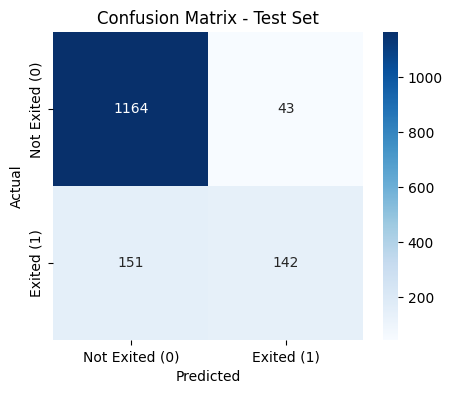

In [633]:
cm = confusion_matrix(y_test.flatten(), pred_test.flatten())

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Exited (0)", "Exited (1)"],
            yticklabels=["Not Exited (0)", "Exited (1)"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - Test Set")
plt.show()

# 14 - SHOW THE LOSS CURVE

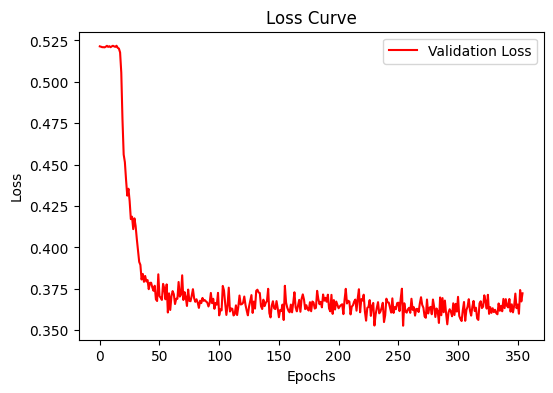

In [634]:
plt.figure(figsize=(6,4))
plt.plot(loss_history, label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# 15 - COMPARE MODEL ACCURACY BETWEEN TRAINING,VALIDATION & TESTING SETS

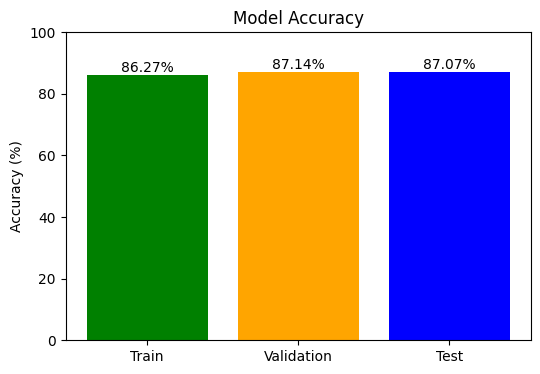

In [635]:
train_acc = accuracy(y_train, pred_train) * 100
val_acc = accuracy(y_val, pred_val) * 100
test_acc = accuracy(y_test, pred_test) * 100

plt.figure(figsize=(6,4))
plt.bar(["Train", "Validation", "Test"], [train_acc, val_acc, test_acc], color=["green", "orange", "blue"])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy")
plt.ylim(0, 100)
for i, v in enumerate([train_acc, val_acc, test_acc]):
    plt.text(i, v+1, f"{v:.2f}%", ha="center")
plt.show()